# Mercedes-Benz Greener Manufacturing

### DESCRIPTION

##### Reduce the time a Mercedes-Benz spends on the test bench.


#### Following actions should be performed:

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets.
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using XGBoost.

### Importing necessary libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [0]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [0]:
print('Shape train: {}\nShape test: {}'.format(df_train.shape, df_test.shape))

Shape train: (4209, 378)
Shape test: (4209, 377)


In [0]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


1. All columns are anonymised.
2. 8 object type columns (possibly X0..X8) need to be transformed using labelbinarizer/encoder
3. Need to drop ID and y columns, y because its the target variable, and ID because its must be unique for all the 4208 occurences.

## Exploratory Data Analysis

#### Checking distribution of labels

In [0]:
y_train = df_train['y'].values
print(f'Minimum : {min(y_train)} Maximum : {max(y_train)} Mean : {y_train.mean()} Standard Deviation : {y_train.std()}')

Minimum : 72.11 Maximum : 265.32 Mean : 100.66931812782134 Standard Deviation : 12.6778749695168


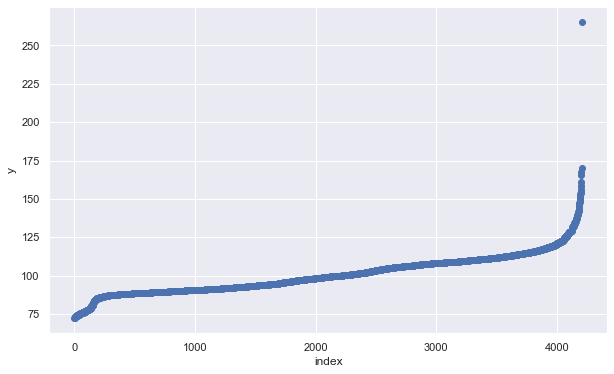

In [0]:
plt.figure(figsize=(10,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

Seems like a single data point is well above the rest.

Now let us plot the distribution graph.

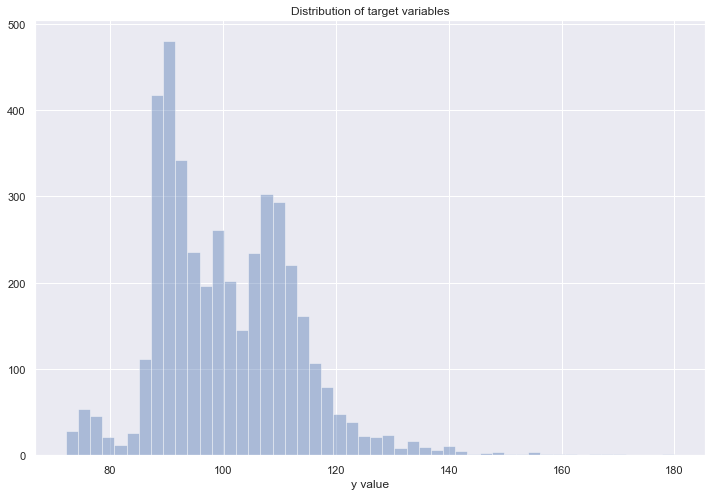

In [0]:
ulimit = 180
df_train['y'].ix[df_train['y']>ulimit] = ulimit
plt.figure(figsize=(12,8))
sns.distplot(df_train.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.title('Distribution of target variables')
plt.show()

1. About normal distribution, and centered around 100
2. We might need to check for outliers since max(y_train) is around 265

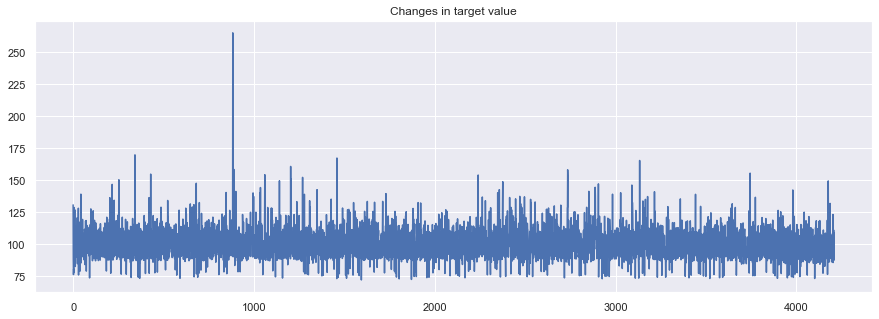

In [0]:
plt.figure(figsize=(15,5))
plt.plot(y_train)
plt.title('Changes in target value');

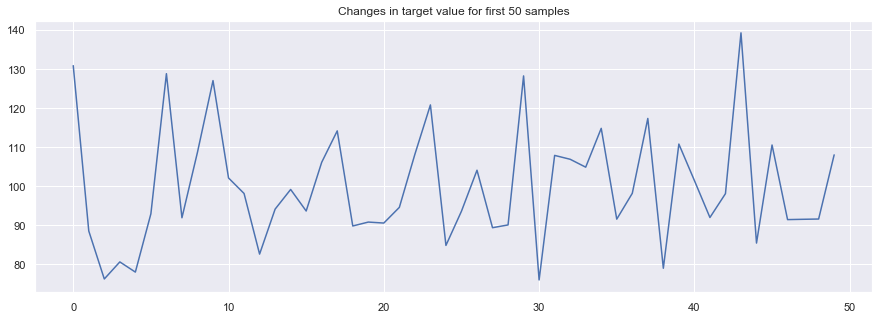

In [0]:
plt.figure(figsize=(15,5))
plt.plot(y_train[:50])
plt.title('Changes in target value for first 50 samples');

1. No pattern, trend, or seasonality, so this doesn't seem to be a time series data
2. Only 1 outlier is present which is the max value

## Let's have a look at input features

In [0]:
cols = [c for c in df_train.columns if 'X' in c]
print(f'Number of features {len(cols)}')
print()
print(f'Types of features : \n {df_train[cols].dtypes.value_counts()}')

Number of features 376

Types of features : 
 int64     368
object      8
dtype: int64


### Find Cardinality

* Create list of 3 lists and iterate through df_train[cols]
* During iteration:
    * find type of all cols
    * find the unique counts in all the cols
    * counts[0] = if unique count = 1 that means its a constant var and no significance since variance is 0, so we will drop it 
    * counts[1] = if unique count = 2 that means its a binary var
    * counts[2] = Rest of the columns

In [0]:
counts = [[],[],[]]

for c in cols:
    typecol = df_train[c].dtype
    uniqueval = len(np.unique(df_train[c]))
    
    if uniqueval == 1: counts[0].append(c)
    elif uniqueval == 2 and typecol == np.int64 :  counts[1].append(c)
    else: counts[2].append(c)
        
print(f' Constant Features : {len(counts[0])} \n Binary Features : {len(counts[1])} \n Categorical Features : {len(counts[2])}')

 Constant Features : 12 
 Binary Features : 356 
 Categorical Features : 8


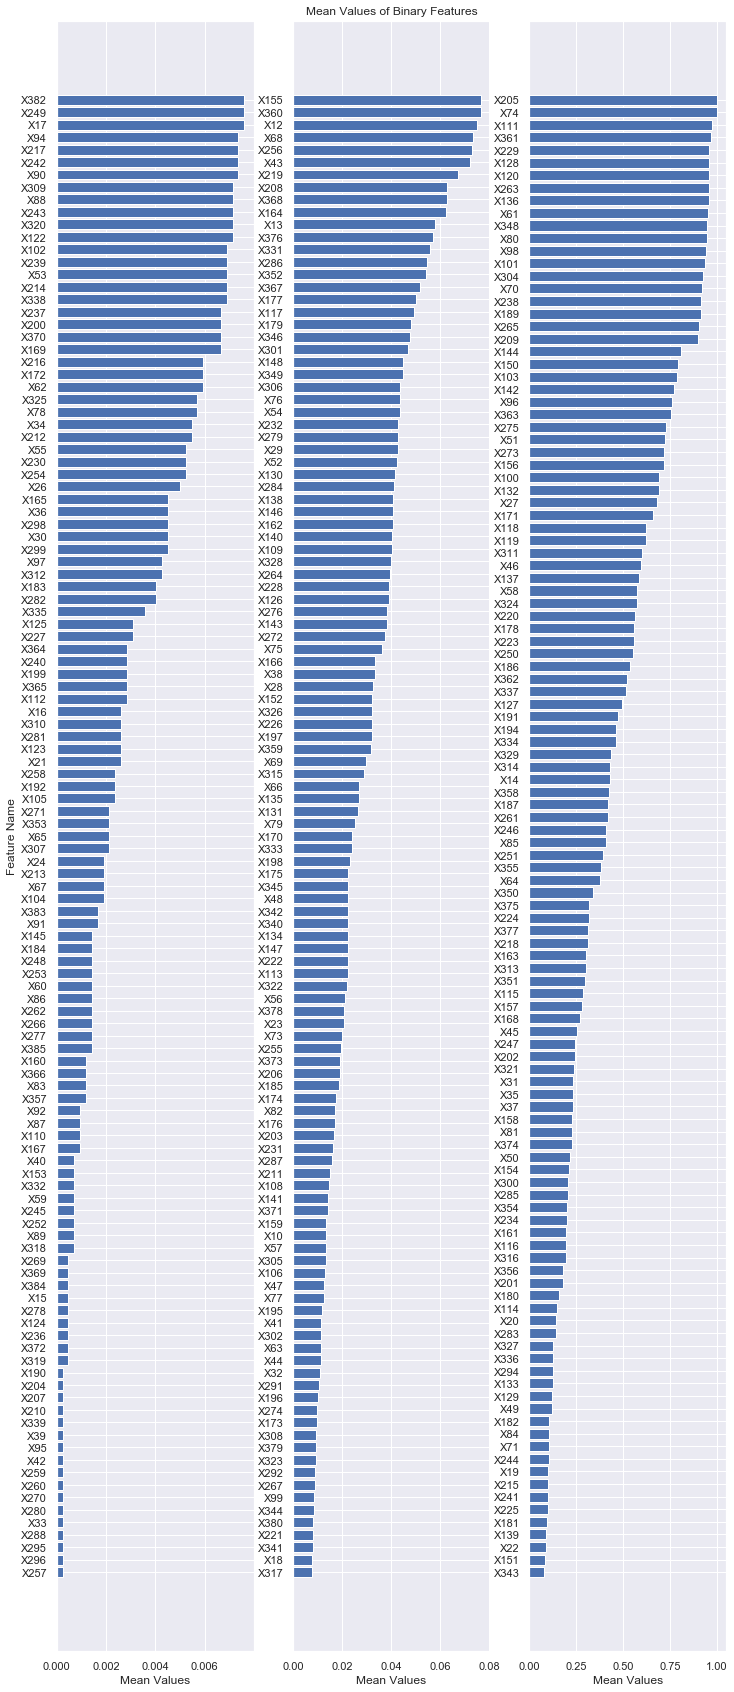

In [0]:
binary_mean = [np.mean(df_train[c]) for c in counts[1]]
binary_name = np.array(counts[1])[np.argsort(binary_mean)]
binary_mean = np.sort(binary_mean)

fig, ax = plt.subplots(1,3,figsize=(12,30))
ax[0].set_ylabel('Feature Name')
ax[1].set_title('Mean Values of Binary Features')

for i in range(3):
    names, means = binary_name[i*119:(i+1)*119], binary_mean[i*119:(i+1)*119]
    ax[i].barh(range(len(means)),means)
    ax[i].set_xlabel('Mean Values')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')

plt.show()

### Checking cardinality of categorical variables

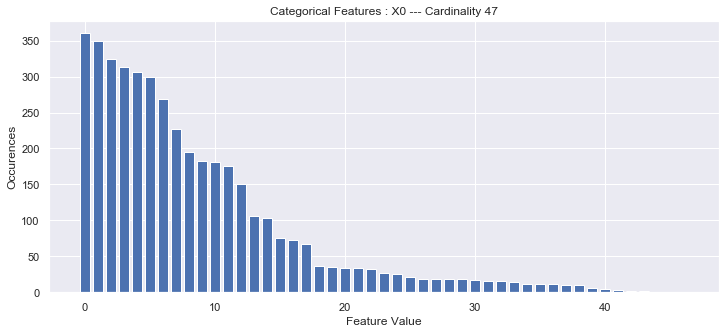

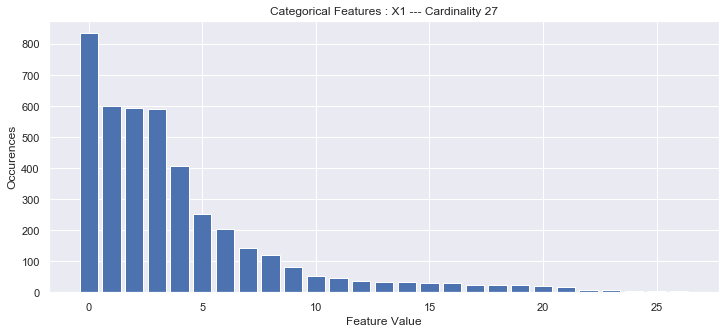

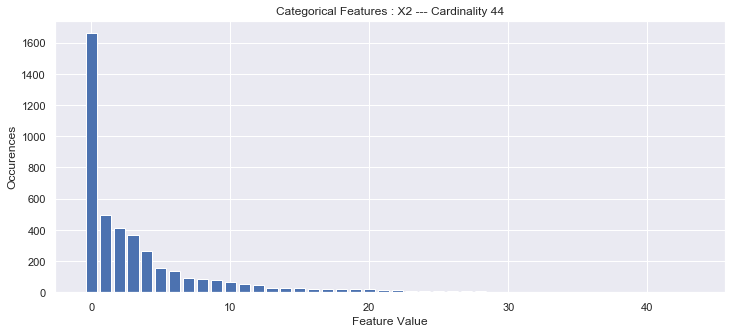

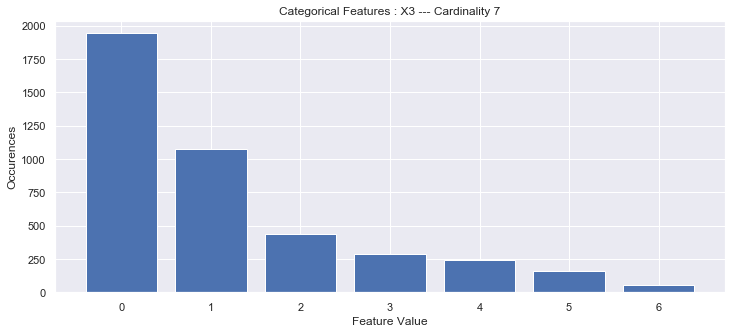

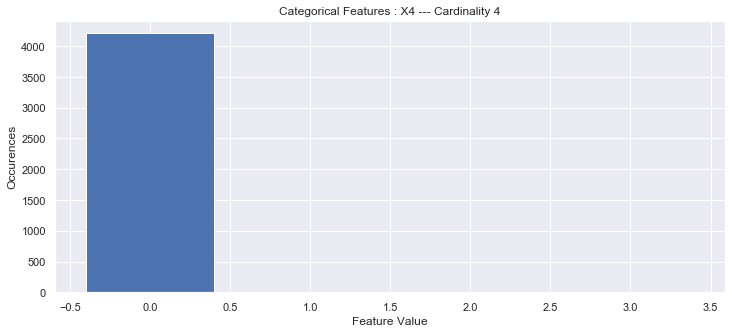

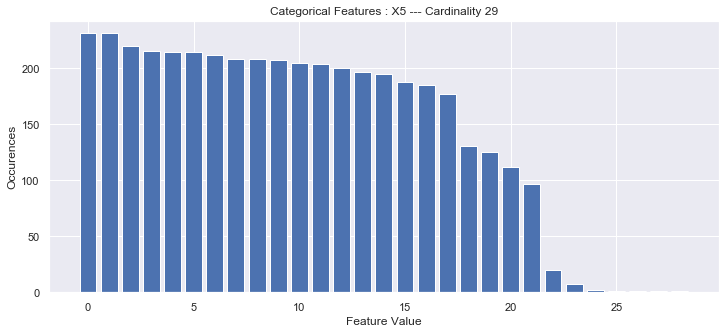

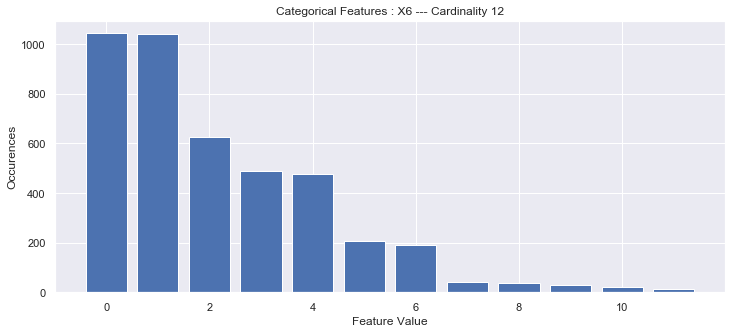

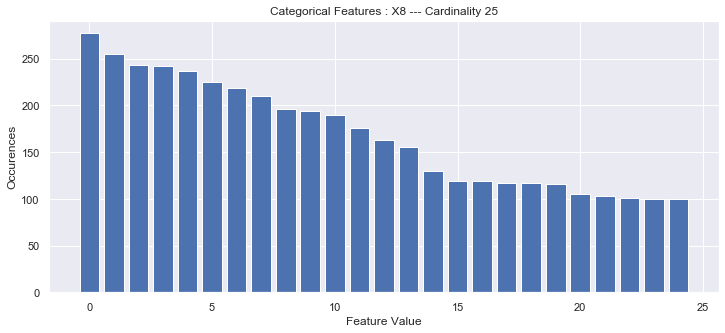

In [0]:
for c in counts[2]:
    val_cnt = df_train[c].value_counts()
    fig, ax = plt.subplots(figsize=(12,5))
    plt.title(f'Categorical Features : {c} --- Cardinality {len(np.unique(df_train[c]))}')
    plt.xlabel('Feature Value')
    plt.ylabel('Occurences')
    plt.bar(range(len(val_cnt)),val_cnt.values)

In [0]:
usable_cols = list(set(df_train.columns)-set(['ID','y']))

y_train = df_train['y'].values
id_test = df_test['ID'].values

x_train = df_train[usable_cols]
x_test = df_test[usable_cols]

### Converting column values into numerical values

In [0]:
for col in usable_cols:
    cardinality = len(np.unique(x_train[col]))
    
    if cardinality == 1:
        x_train.drop(col,axis=1)
        x_test.drop(col,axis=1)
    if cardinality > 2:
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[col] = x_train[col].apply(mapper)
        x_test[col] = x_test[col].apply(mapper)

In [0]:
x_train[counts[2]].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110


## Implementing XGBoost

In [0]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

d_train = xgb.DMatrix(x_train,label=y_train)
d_valid = xgb.DMatrix(x_valid,label=y_valid)
d_test = xgb.DMatrix(x_test)

params={}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train, 'train'),(d_valid, 'valid')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,feval=xgb_r2_score,maximize=True,verbose_eval=10)

[17:07:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.9886	valid-rmse:98.8798	train-r2:-59.4871	valid-r2:-61.8155
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.0528	valid-rmse:80.9815	train-r2:-39.5535	valid-r2:-41.133
[20]	train-rmse:66.426	valid-rmse:66.3805	train-r2:-26.2375	valid-r2:-27.3095
[30]	train-rmse:54.5106	valid-rmse:54.4806	train-r2:-17.3423	valid-r2:-18.0693
[40]	train-rmse:44.8194	valid-rmse:44.7955	train-r2:-11.4001	valid-r2:-11.892
[50]	train-rmse:36.9556	valid-rmse:36.9296	train-r2:-7.4305	valid-r2:-7.76196
[60]	train-rmse:30.5948	valid-rmse:30.5629	train-r2:-4.77815	valid-r2:-5.00123
[70]	train-rmse:25.4735	valid-rmse:25.4291	train-r2:-3.00563	valid-r2:-3.15445
[80]	train-rmse:21.3766	valid-rmse:21.3187	train-r2:-1.82079	valid-r2:-1.91994
[90]	train-rmse:18.1256	valid-rmse:18

In [0]:
p_test = clf.predict(d_test)
pred = pd.DataFrame()
pred['ID'] = id_test
pred['y'] = p_test

In [0]:
pred.head()

,ID,y
0,1,88.515915
1,2,104.233536
2,3,88.972939
3,4,76.732613
4,5,111.140244


## Thank You